# Introduction to Machine Learning
> Group Member: Yue Pang, Zili Huang, Jiabo Cheng<br>
> Github Address:

# Abstract 
Machine learning (ML) is the study of computer algorithms that improve automatically through experience. Machine learning algorithms build a mathematical model based on sample data, known as "training data", to make predictions or decisions without being explicitly programmed to do so. 

In this course, we will mainly focus on supervised learning. You will learn several fundamental terminologies and basic machine learning algorithms, to solve both regression and classification problems, such as linear regression, logistic regression, and neural network. This course will also contain some methods to evaluate the performace of your prediction. In the end, we will show some examples which utilized these methods, to help you obtain a better understanding of machine learning. 

# Content
* Regression
    * Gradient Descent
        * Introduction
        * Implementation
        * Example
        * Quiz
    * KNN
        * Introduction
        * Implementation
        * Example
        * Quiz
    * Decision Tree
        * Introduction
        * Implementation
        * Example
        * Quiz
* Classification
    * Logistic Regression
        * Introduction
        * Main Idea
        * Visualization
        * Example
    * Naive Bayes Classifier
        * Introduction 
        * Main Idea
        * Example
    * Neural Network
        * Introduction 
        * Main Idea
        * Example
    * Quiz
* Evaluation
    * Introduction
    * Measures for Regression
    * Confusion Matrix
    * Measures for Binary: ROC Measures
    * Overfitting and Underfitting
    * Quiz

# Regression
## Gradient Descent
### Introduction
Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a a differentiable function.

For one sample:<br />
Given feature $X: X_1, X_2, X_3, ..., X_i$ and target Y<br />
We can formulate a regression model: $f(X)=\theta_0+\theta_1*X_1+...+\theta_i*X_i$<br />
Let $X_0 = 1$, $f(X)=\sum\theta_i*X_i$<br />
So, the regression loss is: $L(Y,f(X))=(Y-f(X))^2$<br />
<br />
For n samples:<br />
The regression loss is: $L(Y,f(X))=\frac{1}{n}\sum(Y-f(X))^2$<br />
<br />
Then, our optimization problem becomes: $\hat{\theta}=argminL(Y,f(X))$<br />
We can solve this kind of minimization problem using an iterative technique termed Gradient Descent.<br />
<br />
Gradient descent method:<br />
* step 1: Initialize vector $\theta$: $\theta^0 = 0$ (or randomly), initialize stepsize $\lambda$<br />
* step 2: Evaluate the gradient at current value of the parameter vector $\theta^t$: $\frac{\partial L(Y,f(X))}{\partial \theta}\mid_{\theta=\theta_t}$
* step 3: Update the estimate $\theta$: $\theta_{t+1}=\theta_t-\lambda*\frac{\partial L(Y,f(X))}{\partial \theta}\mid_{\theta=\theta_t}$<br />
* step 4: Go to step 2

Stopping crierion:<br />
* Set maximum iterations number. The iterations stop when reach the maximum iterations number.
* Set $\epsilon$ to check if $\theta$ is not changing notably. The iterations stop when $\mid\mid\theta_{t+1}-\theta_t\mid\mid_2<\epsilon$.

### Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from matplotlib.colors import ListedColormap
from math import log

In [2]:
# function to perform gradient descent
def gradient_descent(Y,X,stepsize,max_iterations,epsilon):
    Y = Y.tolist()
    X = X.tolist()
    
    n = len(Y)
    m = len(X[0])
    
    # initialize theta
    theta = m * [0]
    
    # record changes of theta 
    theta_storage = (max_iterations+1) * [0]
    theta_storage[0] = theta
    
    # update theta
    for i in range(1,max_iterations+1):
        
        pred = n * [0]
        diff = n * [0]
        for j in range(n):
            for k in range(m):
                pred[j] = pred[j] + theta[k]*X[j][k]
            diff[j] = pred[j] - Y[j]
        
        temp = theta
        theta = m * [0]
        for p in range(m):
            diff_sum = 0
            for q in range(n):
                diff_sum = diff_sum + diff[q]*X[q][p]
            theta[p] = temp[p] - stepsize*diff_sum*2/n
        
        theta_storage[i] = theta
        
        iteration_time = i
        
        # check convergence
        dist = 0
        for l in range(m):
            dist = dist + (theta_storage[i][l] - theta_storage[i-1][l])**2
        
        if pow(dist,0.5) < epsilon:
            break
                       
    # show changes of theta
    iterations = np.arange(0,iteration_time+1,1)
        
    for s in range(m):
        theta_array = np.zeros(iteration_time+1)
        for t in range(iteration_time+1):
            theta_array[t] = theta_storage[t][s]
            
        plt.plot(iterations,theta_array)
        plt.xlabel("iterations")
        plt.ylabel("theta"+str(s))
        plt.show()
                
    return theta      

In [3]:
# function to do prediction using gradient descent
def predict_gradient_descent(X,theta):
    for i in range(len(X)):
        Y = X[i]*theta[i]
    return Y

### Example
Use the dataset "salary_year" to show how gradient descent works. This dataset has two column: salary and years of experience. We are going to find the relation between salary and years of experience.

In [5]:
# import dataset
salary_year = pd.read_csv("salary_year.csv")

In [6]:
# show dataset
salary_year

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0.5, 1.0, 'salary vs years of experience')

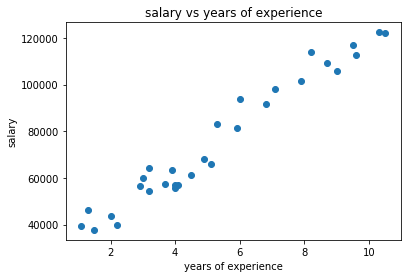

In [7]:
# visulize dataset
salary = np.asarray(salary_year['Salary'])
years = np.asarray(salary_year['YearsExperience'])
plt.scatter(years,salary)
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("salary vs years of experience")

In [8]:
# prepocess data
salary_year["X_0"] = 1
year = salary_year.iloc[:,[2,0]]
year = year.values

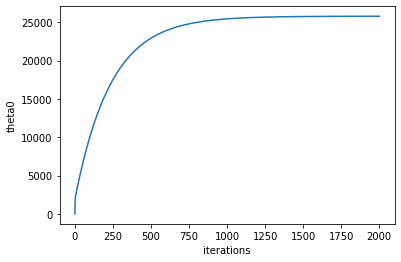

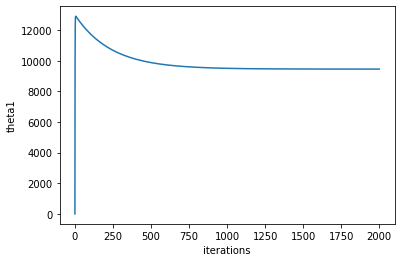

[25787.240971208394, 9450.698250047992]

In [9]:
# apply function gradient_descent
theta_result = gradient_descent(salary,year,0.01,2000,0.0001)
theta_result

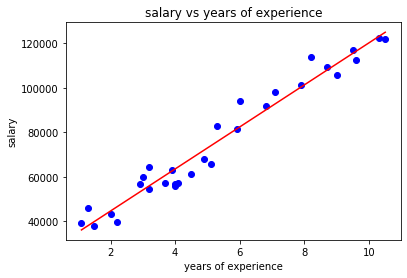

In [10]:
# visulaization
f = np.zeros(len(years))
for i in range(len(years)):
    f[i] = theta_result[0] + theta_result[1]*years[i]
plt.scatter(years,salary,color = "blue")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("salary vs years of experience")
plt.plot(years,f,color = "red")

### Quiz

**Question 1** : Consider the training set：<br/>

|x|y|
|-----|-----|
|1|0.5
|2|1|
|4|2|
|0|0|

Consider the linear regression model $h_\theta(x) = \theta_0+\theta_1x$. What are the values of $\theta_0$ and $\theta_1$ that you would expect to obtain upon running gradient descent on this model? (Linear regression will be able to fit this data perfectly.)

A.$\theta_0 = 0.5$,$\theta_1 = 0$<br/>
B.$\theta_0 = 0.5$,$\theta_1 = 0.5$<br/>
C.$\theta_0 = 1$,$\theta_1 = 0.5$<br/>
D.$\theta_0 = 0$,$\theta_1 = 0.5$<br/>

Answer:D

**Question 2** : Based on the traning set in question 1, suppose we set $\theta_0 = -1$, $\theta_1 = 0.5$. What is $h_\theta(4)$?<br />

A.1<br />
B.2<br />
C.3<br />
D.4<br />
<br />
Answer:A

**Question 3** : We can get multiple local optimum solutions if we solve a linear regression problem by
minimizing the sum of squared errors using gradient descent.<br />

A.TRUE<br />
B.FALSE<br />

Answer:B 

**Question 4** : Gradient Descent can only be used for Regression Problems.<br />

A.TRUE<br />
B.FALSE<br />

Answer:B 

## KNN
### Introduction
K Nearest Neighbors(KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:
* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.<br />

Most common distance measures:
* Euclidean distance: $d(a,b)=\sqrt{(a_1-b_1)^2+...+(a_i-b_i)^2}$
* Manhattan distance: $d(a,b)=\mid a_1-b_1\mid+...+\mid a_i-b_i\mid$

Given train set(X_train, Y_train) and test set(X_test,Y_test):<br />
KNN method:<br />
* step 1: Set parameter k<br />
(for each data in test set, follow step 2 to 4)
* step 2: Calculate euclidean distance (or manhattan distance) between X_train and X_test.
* step 3: Sort distances from small to large
* step 4: Choose the first k distances and their corresponding train data
* step 5: 
    * In KNN regression: Calculate the average of chosen k Y_train. The average is the regression value for X_test
    * In KNN classification: Count the number of each class in chosen k Y_train. The class with the largest number is the class for X_test


### Implementation

In [13]:
# function to calculate euclidean distance
def euclidean_distance(a,b):
    e_dist = 0
    for i in range(len(a)):
        e_dist = e_dist + (a[i] - b[i])**2
    return pow(e_dist,0.5)

In [14]:
# function to calculate manhattan distance
def manhattan_distance(a,b):
    m_dist = 0
    for i in range(len(a)):
        m_dist = m_dist + abs(a[i]-b[i])
    return m_dist

In [15]:
# funciton to perform KNN regression
def knn_regression(Y_train,X_train,X_test,k):
    m = len(X_train)
    n = len(X_test)
    Y_pred = np.zeros(n)
    
    for i in range(n):
        
        # calculate euclidean distance between each X_train and the ith X_test
        dist = np.zeros(m)
        for j in range(m):
            dist[j] = euclidean_distance(X_train[j],X_test[i])
        dist_sort = dist.argsort()
        
        # choose k nearest train data and calculte average target values
        target_value = 0
        for l in range(k):
            target_value = target_value + Y_train[dist_sort[l]]
        
        Y_pred[i] = target_value/k
               
    return Y_pred

In [16]:
# funciton to perform KNN classification
def knn_classification(Y_train,X_train,X_test,k):
    m = len(X_train)
    n = len(X_test)
    Y_pred = np.zeros(n)
    
    for i in range(n):
        
        # calculate euclidean distance between each X_train and the ith X_test
        dist = np.zeros(m)
        for j in range(m):
            dist[j] = euclidean_distance(X_train[j],X_test[i])
        dist_sort = dist.argsort()
        
        # choose k nearest train data and count the number of classes
        count = {}
        for l in range(k):
            vote = Y_train[dist_sort[l]]
            count[vote] = count.get(vote,0) + 1
            
        # sort the number of classes
        count_sort = sorted(count.items(),key = operator.itemgetter(1),reverse = True)
        
        Y_pred[i] = count_sort[0][0]
        
        Y_pred = Y_pred.astype(np.int64)
        
               
    return Y_pred

In [17]:
# function to calculate correct rate
def correct_knn(Y_test,Y_pred):
    total = len(Y_test)
    correct = 0
    for i in range(total):
        if Y_test[i] == Y_pred[i]:
            correct = correct + 1
    return correct/total

### Example

In [18]:
# import iris dataset
from sklearn.datasets import load_iris
data = load_iris()

In [19]:
# show iris dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
# divide iris dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state = 0)

In [21]:
# apply function knn and calculate correct rate
knn_classification(Y_train,X_train,X_test,k=5)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [22]:
# apply function correct_rate to calculate correct rate
Y_pred = knn_classification(Y_train,X_train,X_test,k=5)
correct_knn(Y_test,Y_pred)

0.9666666666666667

### Quiz

**Question 1** : KNN algorithm does more computation on test time rather than train time.<br />

A.TRUE<br />
B.FALSE<br />

Answer: A

**Question 2** : Which of the following distance metric can not be used in KNN?<br />

A.Manhattan distance<br />
B.Euclidean distance<br />
C.Mahalanobis distance<br />
D.All can be used<br />

Answer: D

**Question 3** : Which of the following option is true about KNN algorithm?<br />

A.It can be used for classification<br />
B.It can be used for regression<br />
C.It can be used in both classification and regression<br />
D.It can not be used in both classification and regression<br />

Answer: C

**Question 4** : Which of the following will be Euclidean Distance between the two data point A(1,3) and B(2,3)?<br />

A.1<br />
B.2<br />
C.4<br />
D.8<br />

Answer: A

## Decision Tree
### Introduction
Decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences.We can split the dataset based on the values of features to construct a decision tree.

To determine which feature is the best choice to splite data, we have to calculate entropy and information gain.
Entropy represent the complexity of data. Data is more complex when entropy is larger. Formula to Calculate entropy:
$$H=-\sum p(x_i)log_2p(x_i)$$
Information gain represent the difference between two entropy values.

Every time we split the data, we choose the feature with the maximum information gain.

### Implementation

In [26]:
# function to calculate entropy
def entropy(dataset):
    
    n = len(dataset)
    count_label = {}
    for i in dataset:
        label = i[-1]
        if label not in count_label.keys():
            count_label[label] = 0
        count_label[label] = count_label[label]+1
    
    sum_entropy = 0
    for key in count_label:
        prob = float(count_label[key])/n
        sum_entropy = sum_entropy - prob*log(prob,2)
    
    return sum_entropy

In [27]:
# function to split data
def split(dataset,col,value):
    splited_data = []
    for i in dataset:
        if i[col] == value:
            vector = i[:col]
            vector.extend(i[col+1:])
            splited_data.append(vector)
    return splited_data

In [28]:
# function to choose best split way
def best_split(dataset):
    num_label = len(dataset[0])-1
    initial_entropy = entropy(dataset)
    best_info_gain = 0
    best_label_index = -1
    for i in range(num_label):
        featlist = [j[i] for j in dataset]
        unique = set(featlist)
        new_entropy = 0
        for value in unique:
            subdataset = split(dataset,i,value)
            prob = len(subdataset)/float(len(dataset))
            new_entropy = new_entropy+prob*entropy(subdataset)
        info_gain = initial_entropy - new_entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_splite_index = i
    return best_splite_index

In [29]:
# function to determine the final class
def max_class(class_list):
    count_class = {}
    for i in class_list:
        if i not in count_class.keys():
            count_class[i] = 0
        count_class[i] = count_class[i]+1
    sort_class = sorted(count_class.items(),key=operator.itemgetter(1),reverse = True)
    return sort_class[0][0]

In [30]:
# function to construct desicion tree
def decision_tree(dataset,label):
    
    class_list = [i[-1] for i in dataset]
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(dataset[0])==1:
        return max_class(class_list)
    
    best_index = best_split(dataset)
    best_label = label[best_index]
    label.append(best_label)
    decision_tree = {best_label:{}}
    del(label[best_index])
    feature = [i[best_index] for i in dataset]
    unique = set(feature)
    
    for value in unique:
        sublabel = label[:]
        new_dataset = split(dataset,best_index,value)
        decision_tree[best_label][value] = decision_tree(new_dataset,sublabel)
    
    return decision_tree

### Example

In [31]:
# import dataset
from sklearn.tree import DecisionTreeRegressor
dataset = pd.read_csv('position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [32]:
# Use decision tree method to build model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [33]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

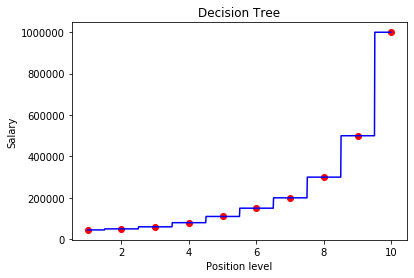

In [34]:
# Visulization
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Classification
## Logistic Regression
### Introduction
Logistic regression extends the ideas of linear regression to the situation where the outcome variable, Y , is categorical. We can think of a categorical variable as dividing the records into classes.

In this chapter, we focus on the use of logistic regression for classiication. We deal only with a binary outcome variable having two possible classes. Popular examples of binary outcomes are success/failure, yes/no, buy/don’t buy, default/don’t default, and survive/die. For convenience, we often code the values of the binary outcome variable Y as 0 and 1.

### Main Idea
Logistic regression is a discriminant approach, which approach for directly modeling the posterior probabilities $\pi(x | \theta)$ of the labels is logistic regression.

Let’s focus on the binary case y ∈ [0,1] and use empirical risk minimization to find the best model.

#### Step 1: Function Set

First, we have to understand the defination of the logistic function is:(also called sigmoid function)<br>

$\pi(x)=P(y=1|x)=\frac{1}{1+exp(-\theta^{T}x)}$ <br>
Note: $\theta ^{T}x=\theta_{0}+\theta^{T}x $
             

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

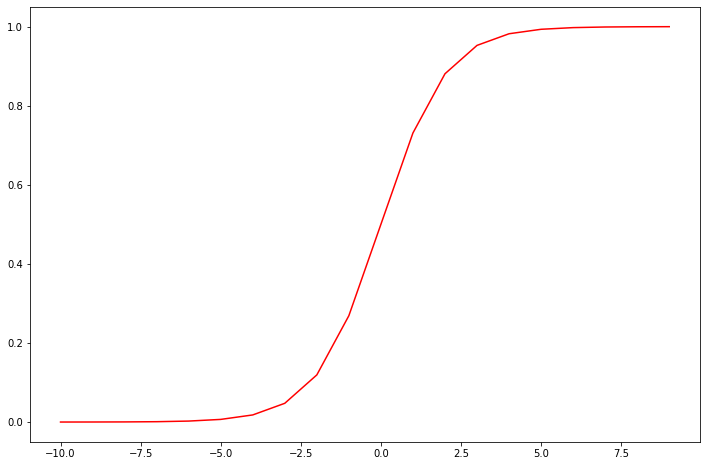

In [21]:
def sigmoid(z):
    p= np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))
    return p
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

Obviously this result in predicted probabilities is between 0 and 1, evaluating sigmoid(0) should give you exactly 0.5

When we want to find the class of predictor,<br>
If $\pi(x)=P(y=1|x)$ > cut-off value,for example:0.5, output class 1. <br>Otherwise, output class 2.

#### Step 2: Find the best function

In order to evaluate the quality of the function, we have to define a loss function. Next, given a set of $\theta$ and x, we could use empirical risk minimization to evaluate.<br>

The loss function: <br>

$L(y, \pi (x))= -y ln(x(\pi))-(1-y)ln(1-\pi(x))$<br>

The key idea is : <br>

$arg minR_{emp}(\theta)= arg min \Sigma ^{n}_{i=1}L(y^{(i)},\pi (x^{i}|\theta))$


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


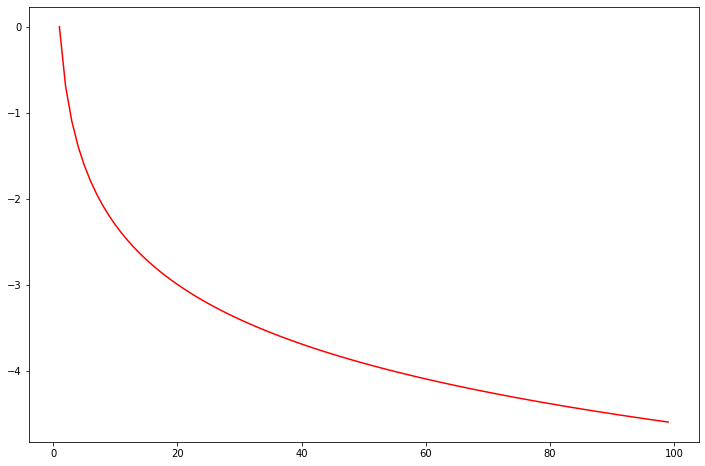

In [112]:
def _cross_entropy_loss(y_pred, Y_label): 
    cross_entropy = -np.dot(Y_label, np.log(y_pred)) - np.dot((1 - Y_label), np.log(1 - y_pred))
    return cross_entropy

nums = np.arange(1, 100, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, _cross_entropy_loss(nums,1), 'r')

This function is called cross-entropy loss function, it penalizes confidently wrong predictions heavily. Also we can derive it from the negative log-likelihood of Bernoulli / Logistic regression model in statistics.

### Visualization for Logistic Regression.
The sample dataset before classification

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


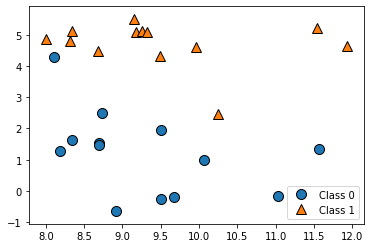

In [62]:
import mglearn
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)



The sample data classified by logistic regression.

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


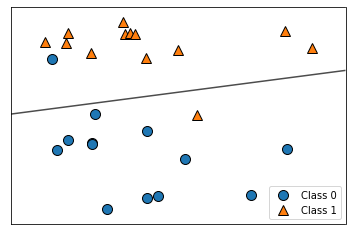

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
clf = LogisticRegression().fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)


### Example:
This dataset is obtained by removing unnecessary attributes and balancing the ratio between positively and negatively labeled data in the Census-Income (KDD) Data Set, which can be found in UCI Machine Learning Repository. 
#### Other functions we needed:

In [32]:
def _shuffle(X, Y):
    # This function shuffles two equal-length list/array, X and Y, together.
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    return (X[randomize], Y[randomize])


def _f(X, w, b):

    return _sigmoid(np.matmul(X, w) + b)

def _predict(X, w, b):
    # This function returns a truth value prediction for each row of X 
    # by rounding the result of logistic regression function.
    return np.round(_f(X, w, b)).astype(np.int)
    
def _accuracy(Y_pred, Y_label):
    # This function calculates prediction accuracy
    acc = 1 - np.mean(np.abs(Y_pred - Y_label))
    return acc


def _gradient(X, Y_label, w, b):
    # This function computes the gradient of cross entropy loss with respect to weight w and bias b.
    y_pred = _f(X, w, b)
    pred_error = Y_label - y_pred
    w_grad = -np.sum(pred_error * X.T, 1)
    b_grad = -np.sum(pred_error)
    return w_grad, b_grad

#### Prepare the data.
In order for better performance, we will normalize all the data. And Split the dataset into training set and validation set to evaluate the performa

In [107]:
import numpy as np

np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'

# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1] for line in f], dtype = float)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = float)

def _normalize(X, train = True, specified_column = None, X_mean = None, X_std = None):
    if specified_column == None:
        specified_column = np.arange(X.shape[1])
    if train:
        X_mean = np.mean(X[:, specified_column] ,0).reshape(1, -1)
        X_std  = np.std(X[:, specified_column], 0).reshape(1, -1)

    X[:,specified_column] = (X[:, specified_column] - X_mean) / (X_std + 1e-8)
     
    return X, X_mean, X_std

def _train_dev_split(X, Y, dev_ratio = 0.25):
    
    train_size = int(len(X) * (1 - dev_ratio))
    return X[:train_size], Y[:train_size], X[train_size:], Y[train_size:]



#### Train the model using the training set.

In [108]:
X_train, X_mean, X_std = _normalize(X_train, train = True)
X_test, _, _= _normalize(X_test, train = False, specified_column = None, X_mean = X_mean, X_std = X_std)
    
# Split data into training set and development set
dev_ratio = 0.1
X_train, Y_train, X_dev, Y_dev = _train_dev_split(X_train, Y_train, dev_ratio = dev_ratio)

train_size = X_train.shape[0]
dev_size = X_dev.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]
print('Size of training set: {}'.format(train_size))
print('Size of development set: {}'.format(dev_size))
print('Size of testing set: {}'.format(test_size))
print('Dimension of data: {}'.format(data_dim))

Size of training set: 48830
Size of development set: 5426
Size of testing set: 27622
Dimension of data: 510


In [33]:
# Zero initialization for weights ans bias
w = np.zeros((data_dim,)) 
b = np.zeros((1,))

# Some parameters for training    
max_iter = 10
batch_size = 8
learning_rate = 0.2

# Keep the loss and accuracy at every iteration for plotting
train_loss = []
dev_loss = []
train_acc = []
dev_acc = []

# Calcuate the number of parameter updates
step = 1

# Iterative training
for epoch in range(max_iter):
    # Random shuffle at the begging of each epoch
    X_train, Y_train = _shuffle(X_train, Y_train)
        
    # Mini-batch training
    for idx in range(int(np.floor(train_size / batch_size))):
        X = X_train[idx*batch_size:(idx+1)*batch_size]
        Y = Y_train[idx*batch_size:(idx+1)*batch_size]

        # Compute the gradient
        w_grad, b_grad = _gradient(X, Y, w, b)
            
        # gradient descent update
        # learning rate decay with time
        w = w - learning_rate/np.sqrt(step) * w_grad
        b = b - learning_rate/np.sqrt(step) * b_grad

        step = step + 1
            
    # Compute loss and accuracy of training set and development set
    y_train_pred = _f(X_train, w, b)
    Y_train_pred = np.round(y_train_pred)
    train_acc.append(_accuracy(Y_train_pred, Y_train))
    train_loss.append(_cross_entropy_loss(y_train_pred, Y_train) / train_size)

    y_dev_pred = _f(X_dev, w, b)
    Y_dev_pred = np.round(y_dev_pred)
    dev_acc.append(_accuracy(Y_dev_pred, Y_dev))
    dev_loss.append(_cross_entropy_loss(y_dev_pred, Y_dev) / dev_size)

print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

Training loss: 0.2713554352464059
Development loss: 0.2896359675026286
Training accuracy: 0.8836166291214418
Development accuracy: 0.8733873940287504


#### Plot the loss and accuracy charts.

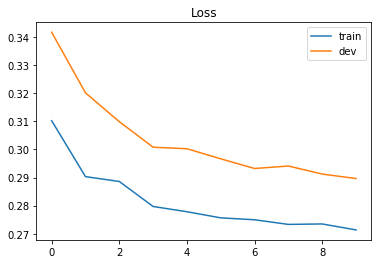

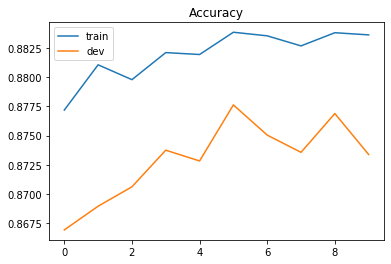

In [34]:
import matplotlib.pyplot as plt

# Loss curve
plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train', 'dev'])
plt.savefig('loss.png')
plt.show()

# Accuracy curve
plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train', 'dev'])
plt.savefig('acc.png')
plt.show()

## Naive Bayes Classifer
### Introduction

Logistic regression measures the relationship between a output variable Y (categorical) and one or more independent variables, which is so called discriminative functions. 

However, generative models measure both likelihoods p(x|Ck) and priors p(Ck) that can be used, via Bayes theorem, to compute posteriors p(Ck|x).

Before we dive into Bayes theorem, let's review several basic concepts:

* Marginal Probability: The probability of an event irrespective of the outcomes of other random variables, e.g. P(A).


* Joint Probability: Probability of two (or more) simultaneous events, e.g. P(A and B) or P(A, B).The joint probability is the probability of two (or more) simultaneous events, often described in terms of events A and B from two dependent random variables, e.g. X and Y. The joint probability is often summarized as just the outcomes, e.g. A and B.


* Conditional Probability: Probability of one (or more) event given the occurrence of another event, e.g. P(A given B) or P(A | B). The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. X and Y.



Bayes' theorem provides a way that we can calculate the probability of a piece of data belonging to a given class. Bayes' theorem is stated as:
$P(C|x_1,x_2...x_m)=\frac{P(x_1,x_2...x_m|C)P(C)}{P(x_1,x_2...x_m|C)P(C)+P(x_1,x_2...x_m|Not C)P(Not C)}$ <br> 
When $P(C|x_1,x_2...x_m) is the probability of class given the provided data.

Now that we are familiar with Bayes Theorem and the meaning of the terms, let’s look at a scenario where we can calculate it.

### Main idea
 
#### Step 1:
We will need to calculate the probability of data by the class they belong to, the so-called base rate.This means that we will first need to separate our training data by class. A relatively straightforward operation.

We can create a dictionary object where each key is the class value and then add a list of all the records as the value in the dictionary.

In [73]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

After putting this all together, we can test our separate_by_class() function on the contrived dataset. Next we can start to develop the functions needed to collect statistics.
#### Step 2: Summarize Dataset
We need two statistics from a given set of data.

* The mean is the average value and can be calculated as:


In [76]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

* The sample standard deviation is calculated as the mean difference from the mean value. This can be calculated as:


In [78]:
from math import sqrt

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

We can do that by gathering all of the values for each column into a list and calculating the mean and standard deviation on that list. Once calculated, we can gather the statistics together into a list or tuple of statistics. Then, repeat this operation for each column in the dataset and return a list of tuples of statistics.

In [ ]:
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

#### Step 3: Summarize Data By Class
We require statistics from our training dataset organized by class.
After we have developed the separate_by_class() function to separate a dataset into rows by class. And we have developed summarize_dataset() function to calculate summary statistics for each column.Now we need to put all of this together and summarize the columns in the dataset organized by class values.

In [81]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

Using the sample data to check the result of summary by the class. 

In [82]:
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]
summary = summarize_by_class(dataset)
for label in summary:
    print(label)
    for row in summary[label]:
        print(row)


0
(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)
1
(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)


#### Step 4: Gaussian Probability Density Function
Calculating the probability or likelihood of observing a given real-value like X1 is difficult. One way we can do this is to assume that X1 values are drawn from a distribution, such as a bell curve or Gaussian distribution.


A Gaussian distribution can be summarized using only two numbers: the mean and the standard deviation. Therefore, with a little math, we can estimate the probability of a given value. This piece of math is called a Gaussian Probability Distribution Function (or Gaussian PDF) and can be calculated as:

$f_{\mu,\Sigma}(x)=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$

In [86]:
from math import sqrt
from math import pi
from math import exp
 
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

#### Step 5: Class Probabilities
First, the total number of training records is calculated from the counts stored in the summary statistics. This is used in the calculation of the probability of a given class or P(class) as the ratio of rows with a given class of all rows in the training data.

Next, probabilities are calculated for each input value in the row using the Gaussian probability density function and the statistics for that column and of that class. Probabilities are multiplied together as they accumulated.

This process is repeated for each class in the dataset.

In [88]:
# Create a dictionary of probabilities of each class.
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

### Example:

In this example, we will use the Iris flower spicies dataset, which involes predicting the flower species given measurements of iris flowers. It is a multiclass classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. 
#### Other functions we needed:

In [104]:
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores


# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

#### Using the Iris Dataset to Train and Calculate the Accuracy

In [105]:
# Test Naive Bayes on Iris Dataset
seed(1)
filename = './data/iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [93.33333333333333, 96.66666666666667, 100.0, 93.33333333333333, 93.33333333333333]
Mean Accuracy: 95.333%


## Neural Network
### Introduction
Neural networks, a flexible data-driven method that can be used for classiication. Although considered a “blackbox” in terms of interpretability, neural nets have been highly successful in terms of pre- dictive accuracy. We discuss the concepts of “nodes” and “layers” (input layers, output layers, and hidden layers) and how they connect to form the structure of a network. We then explain how a neural network is itted to data using a numerical example. 
### Main Idea
#### Neurons: Building Blocks

First, we have to talk about neurons, the basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output. Here’s what a 2-input neuron looks like:

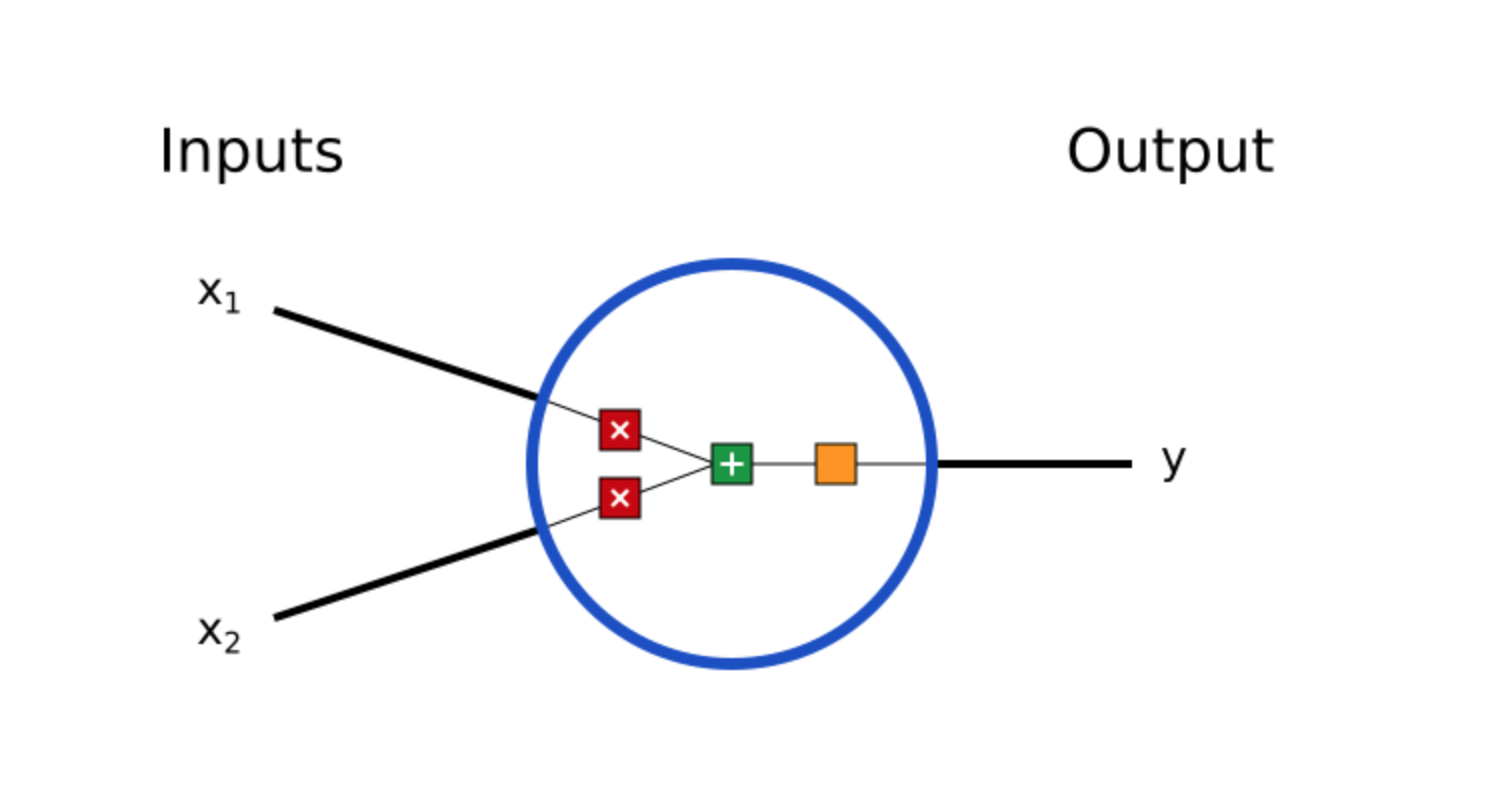

In [140]:
from IPython.display import Image
Image("./data/Neural.png")

First, each input is multiplied by a weight:

$x_1 \to x_1 * \omega_1$ <br>
$x_2 \to x_2 * \omega_2$

Next, all the weighted inputs are added together with a bias b:

$(x_1*\omega_1)(x_2*\omega_2)+b$

Finally, the sum is passed through an activation function:

$y = f(x_1*\omega_1+x_2*\omega_2+b)$

In [130]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def feedforward(weights, bias, inputs):
    total = np.dot(weights, inputs) + bias
    return sigmoid(total)

#### Combining Neurons into a Neural Network
A neural network is nothing more than a bunch of neurons connected together. Here’s what a simple neural network might look like:

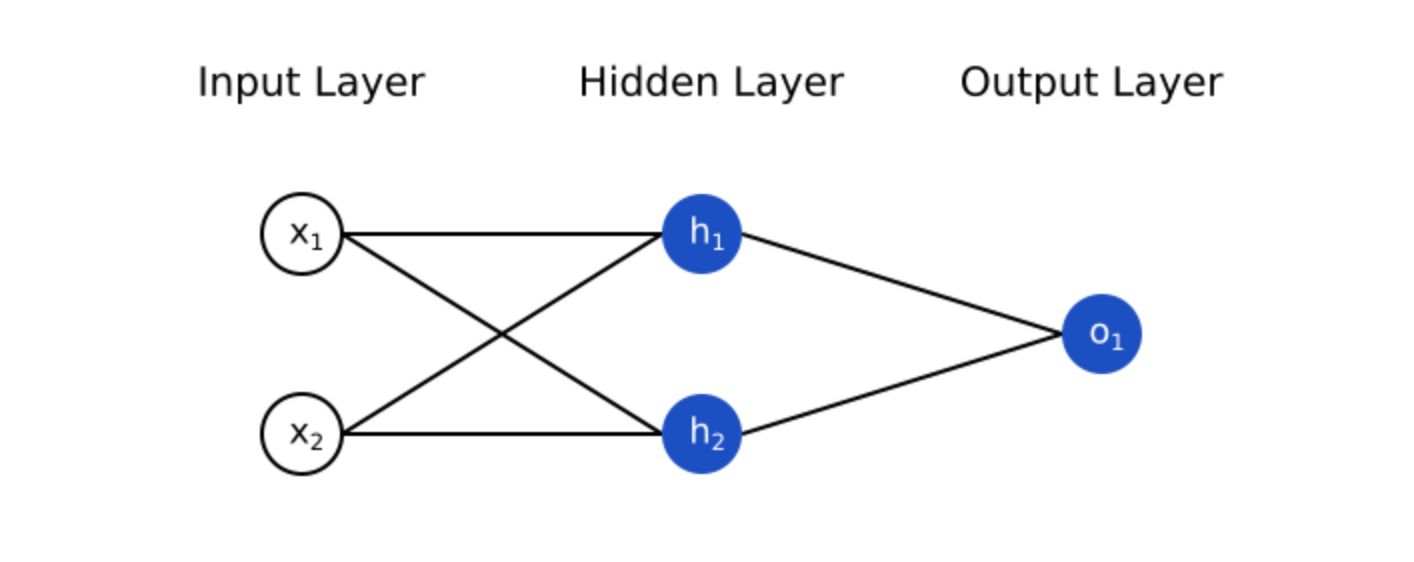

In [141]:
from IPython.display import Image
Image("./data/Network.png")

This network has 2 inputs, a hidden layer with 2 neurons (h1 and h2 ), and an output layer with 1 neuron (o1). Notice that the inputs for o1 are the outputs from h1 and h2 — that’s what makes this a network.

For example:

$h_1=h_2=f(\omega*x+b)$

$o_1 = f(\omega[h_1,h_2]+b)$

In [125]:
def feedforward(w1,w2,w3,w4,w5,w6,b1,b2,b3,x):

    h1 = sigmoid(w1 * x[0] + w2 * x[1] + b1)
    h2 = sigmoid(w3 * x[0] + w4 * x[1] + b2)
    o1 = sigmoid(w5 * h1 + w6 * h2 + b3)
    return o1


#### Trainning a Neural Network
Before we train our network, we first need a way to quantify how “good” it’s doing so that it can try to do “better”. That’s what the loss is.

We’ll use the mean squared error (MSE) loss:

$MSE = \frac{1}{n}\Sigma^{n}_{i=1}(y_{true}-y_{pred})^2$

$(y_{true}-y_{pred})^2$ is known as the squared error. Our loss function is simply taking the average over all squared errors (hence the name mean squared error). The better our predictions are, the lower our loss will be.

In [129]:
def mse_loss(y_true, y_pred):

    return ((y_true - y_pred) ** 2).mean()

After calculated the loss, we also have to update the network's weights and biases to influence its predictions.
Firstly, we have to write the loss as a multivariable function:

$L(\omega_1,\omega_2,\omega_3,\omega_4,\omega_5,\omega_6,b_1,b_2,b_3)$

The partial Derivatives:

$\frac{\delta L}{\delta \omega_1} = \frac{\delta L}{\delta y_{pred}}*\frac{\delta y_{pred}}{\delta h_1} *\frac{\delta h_1}{\delta \omega_1}  $

We can calculate the partial derivatives by working backwards, also called "Backpropagation"

Finally, we could training the model using an optimization algorithm called stochastic gradient descent. The basic update equation is:

$\omega_1 - \eta \frac{\delta L}{\delta \omega_1} \to \omega_1$
$\eta$is the learning rate that controls how fast we train.

Thus, the training process will look like this:
* Choose one sample from our dataset. This is what makes it stochastic gradient descent — we only operate on one sample at a time.

* Calculate all the partial derivatives of loss with respect to weights or biases.
* Use the update equation to update each weight and bias.
* Go back to step 1.

In [138]:
class OurNeuralNetwork:

    def __init__(self):
    # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):

        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

              # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.387
Epoch 10 loss: 0.289
Epoch 20 loss: 0.164
Epoch 30 loss: 0.099
Epoch 40 loss: 0.069
Epoch 50 loss: 0.053
Epoch 60 loss: 0.042
Epoch 70 loss: 0.035
Epoch 80 loss: 0.029
Epoch 90 loss: 0.025
Epoch 100 loss: 0.022
Epoch 110 loss: 0.020
Epoch 120 loss: 0.018
Epoch 130 loss: 0.016
Epoch 140 loss: 0.015
Epoch 150 loss: 0.013
Epoch 160 loss: 0.012
Epoch 170 loss: 0.011
Epoch 180 loss: 0.011
Epoch 190 loss: 0.010
Epoch 200 loss: 0.009
Epoch 210 loss: 0.009
Epoch 220 loss: 0.008
Epoch 230 loss: 0.008
Epoch 240 loss: 0.008
Epoch 250 loss: 0.007
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.006
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

Using our neural network to make some predictions

In [139]:
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.963
Frank: 0.039


### Quiz:
1):
When performing regression or classification, which of the following is the correct way to preprocess the data?

A) Normalize the data → PCA → training - answer

B) PCA → normalize PCA output → training

C) Normalize the data → PCA → normalize PCA output → training

D) None of the above

Answer: A


2):
Suppose you have trained a logistic regression classifier and it outputs a new example x with a prediction ho(x) = 0.2. This means

A) Our estimate for P(y=1 | x)

B) Our estimate for P(y=0 | x) 

C) Our estimate for P(y=1 | x)

D) Our estimate for P(y=0 | x)

Answer：B

3): 
What are the advantages of Naive Bayes?

Answer: In Naïve Bayes classifier will converge quicker than discriminative models like logistic regression, so you need less training data.  The main advantage is that it can’t learn interactions between features.
In Naïve Bayes classifier will converge quicker than discriminative models like logistic regression, so you need less training data.  The main advantage is that it can’t learn interactions between features.

4): What is Bayes’ Theorem? 

Bayes’ Theorem gives you the posterior probability of an event given what is known as prior knowledge.

# Evaluation

## Introduction

   In supervised learning, we are interested in predicting the outcome variable for new records. Three main types of outcomes of interest are:
   
   Predicted numerical value: when the outcome variable is numerical (e.g., house price) <br>
   Predicted class membership: when the outcome variable is categorical (e.g., buyer/nonbuyer)
   Propensity: the probability of class membership, when the outcome vari- able is categorical (e.g., the propensity to default)
   
   Prediction methods are used for generating numerical predictions, while classi- fication methods (“classifiers”) are used for generating propensities and, using a cutoff value on the propensities, we can generate predicted class memberships.


##  Measures for Regression
### Prediction Accuracy Measures

The prediction error for record i is defined as the difference between its actual outcome value and its predicted outcome value: $e_{i}$ = $y_{i}$ − $\hat{y_i}$. A few popular numerical measures of predictive accuracy are:

Mean Error = $\frac{1}{n}$$\sum_{i=1}^{n}$$ei$. This measure is similar to MAE except that it retains the sign of the errors, so that negative errors cancel out positive errors of the same magnitude. It therefore gives an indication of whether the predictions are on average over- or underpredicting the outcome variable.

MAE (mean absolute error/deviation) = $\frac{1}{n}$$\sum_{i=1}^{n}$$\lvert$ei$\rvert$ This gives the magnitude of the average absolute error.<br>

MSE (mean squared error) =$\frac{1}{n}$$\sum_{i=1}^{n}$$ei^{2}$ . This is similar to the standard error of estimate in linear regression, except that it is computed on the validation data rather than on the training data. It has the same units as the outcome variable.<br>

MPE (mean percentage error) = $100\times$$\frac{1}{n}$$\sum_{i=1}^{n}$$ei/yi$. This gives the per- n i=1
centage score of how predictions deviate from the actual values (on average), taking into account the direction of the error.

MAPE (mean absolute percentage error) = $100\times$$\frac{1}{n}$$\sum_{i=1}^{n}$$\lvert$ei/yi$\rvert$. This n i=1
measure gives a percentage score of how predictions deviate (on average) from the actual values.

Such measures can be used to compare models and to assess their degree of prediction accuracy. Note that all these measures are influenced by outliers. To check outlier influence, we can compute median-based measures (and compare to the above mean-based measures) or simply plot a histogram or boxplot of the errors. Plotting the prediction errors’ distribution is in fact very useful and can highlight more information than the metrics alone.

### Comparing Training and Validation Performance

Errors that are based on the training set tell us about model fit, whereas those that are based on the validation set (called “prediction errors”) measure the model’s ability to predict new data (predictive performance). We expect training errors to be smaller than the validation errors (because the model was fitted using the training set), and the more complex the model, the greater the likelihood that it will overfit the training data (indicated by a greater difference between the training and validation errors). In an extreme case of overfitting, the training errors would be zero (perfect fit of the model to the training data), and the validation errors would be non-zero and non-negligible. For this reason, it is important to compare the error plots and metrics (RMSE, MAE, etc.) of the training and validation sets. 

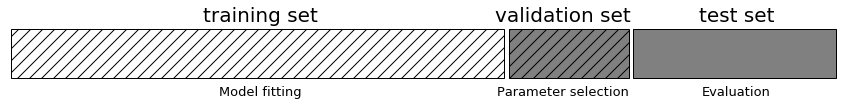

In [20]:
mglearn.plots.plot_threefold_split()

## Confusion Matrix
In practice, most accuracy measures are derived from the confusion matrix, also called classification matrix. This matrix summarizes the correct and incorrect clas- sifications that a classifier produced for a certain dataset. Rows and columns of the confusion matrix correspond to the predicted and true (actual) classes, respectively. 

###  Generalize of Classification Matrix to Multiple Classes
Form classes,classification matrix has m rows and m columns:
* Theoretically,therearem(m-1) misclassificationcosts,since any case could be misclassified in m-1 ways
* Practically too many to work with
* In decision-making context,though,such complexity rarely arises. Usually one class is usually of primary interest.

In [17]:
import sklearn

from sklearn.metrics import confusion_matrix
a= (0,1,0,0,1)
b = (1,0,0,1,1)

confusion = confusion_matrix(a, b)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1 2]
 [1 1]]


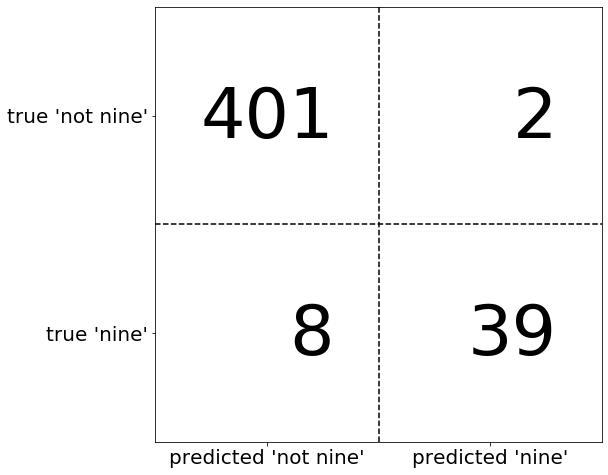

In [18]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

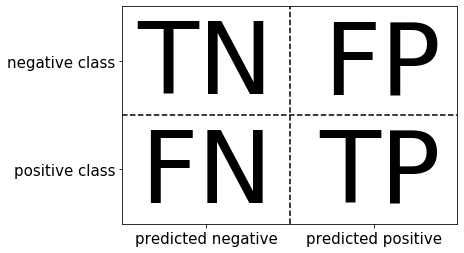

In [19]:
mglearn.plots.plot_binary_confusion_matrix()

As we can see, the Positive and Negative Actual Values are represented as columns, while the Predicted Values are shown as the rows.

* TP = True Positive – The model predicted the positive class correctly, to be a positive class.
* FP = False Positive – The model predicted the negative class incorrectly, to be a positive class.
* FN = False Negative – The model predicted the positive class incorrectly, to be the negative class.
* TN = True Negative – The model predicted the negative class correctly, to be the negative class.

There are two types of errors that can be identified here:

* Type 1 Error: The model predicted the instance to be a Positive class, but it is incorrect. This is False Positive (FP).

* Type 2 Error: The model predicted the instance to be the Negative class, but is it incorrect. This is False Negative (FN).

The confusion matrix gives estimates of the true classification and misclassification rates. Of course, these are estimates and they can be incorrect, but if we have a large enough dataset and neither class is very rare, our estimates will be reliable. Sometimes, we may be able to use public data such as US Census data to estimate these proportions. However, in most business settings, we will not know them.


### Misclassification Error Rate
The misclassification error rate (MCE) counts the number of incorrect predictions and presents them as a rate:

MCE =  $\frac{1}{n}$$\sum_{i=1}^{n}$[$y^i\ne$$\hat{y^i}$] $\subset$[0,1]

Accuracy is defined in a similar fashion for correct classifications:

ACC =  $\frac{1}{n}$$\sum_{i=1}^{n}$[$y^i=$$\hat{y^i}$] $\subset$[0,1]

If the data set is small this can be brittle. The MCE says nothing about how skewed predicted probabilities are.Errors on all classes are weighed equally (often inappropriate)<br>

### Probabilities: Brier Score
Measures squared distances of probabilities from the true class labels:

BS1 = $\frac{1}{n}$$\sum_{i=1}^{n}$($\hat{\pi}$$({x^i}-{y^i})^2$

Fancy name for MSE on probabilities. Usual definition for binary case, $y^{i}$ must be coded as 0 and 1.

BS2 = $\frac{1}{n}$$\sum_{i=1}^{n}$$\sum_{k=1}^{g}$($\hat{\pi}$$_{k}$$({x^i}-O_{k}^{i})^2$

Original by Brier, works also for multiple classes.For the binary case, BS2 is twice as large as BS1, because in BS2 we sum the squared difference for each observation regarding class 0 and class 1, not only the true class.

In [24]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.3])
brier_score_loss(y_true, y_prob)

0.03749999999999999

In [25]:
brier_score_loss(y_true, 1-y_prob, pos_label=0)

0.0375

In [26]:
brier_score_loss(y_true_categorical, y_prob, pos_label="ham")

0.03749999999999999

In [27]:
 brier_score_loss(y_true, np.array(y_prob) > 0.5)

0.0

## Measures for Binary: ROC Measures

A more popular method for plotting the two measures is through ROC (Receiver Operating Characteristic) curves. Starting from the lower left, the ROC curve plots the pairs {sensitivity, specificity} as the cut- off value descends from 1 to 0. (A typical alternative presentation is to plot 1-specificity on the x-axis, which allows 0 to be placed on the left end of the axis, and 1 on the right.) Better performance is reflected by curves that are closer to the top-left corner. The comparison curve is the diagonal, which reflects the performance of the naive rule, using varying cutoff values (i.e., setting different thresholds on the level of majority used by the majority rule). A common met- ric to summarize an ROC curve is “area under the curve (AUC),” which ranges from 1 (perfect discrimination between classes) to 0.5 (no better than the naive rule). 

**Construction of an ROC Curve**

* Step1:Computeclassificationmatricesforbyvaryingcutoff from 0 to 1, say cutoff equal to 0, 0.2, 0.3, ..., 1<br>

* Step2:Foreachclassificationmatrixcomputesensitivityand specificity<br>

* Step3:ComputesensitivityandspecificitybyusingNaïveRule and by setting different thresholds on the level of majority f, (see next two slides for details)<br>

* Step4:Plotsensitivityversus1-specificityforbothclassifier and Naïve Rule<br>

### Constructing ROC Curve with Python

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
#Gerenate smaple data
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

#Split the data into train and test sub-datasets
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

#Fit a model on the train data
model = RandomForestClassifier()
model.fit(trainX, trainy)

# Predict probabilities for the test data
probs = model.predict_proba(testX)

#Keep Probabilities of the positive class only.
probs = probs[:, 1]

#Compute the AUC Score
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.95


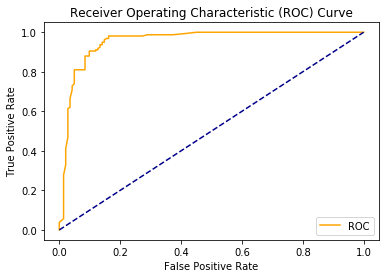

In [34]:
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(testy, probs)
#plot
plot_roc_curve(fpr, tpr)

Area under ROC curve is the probability that a binary classifier gives a higher predictive score to a random “positive example” than to a random “negative example”


### Example: Feature transformations with ensembles of trees

Transform your features into a higher dimensional, sparse space. Then train a linear model on these features.

First fit an ensemble of trees (totally random trees, a random forest, or gradient boosted trees) on the training set. Then each leaf of each tree in the ensemble is assigned a fixed arbitrary feature index in a new feature space. These leaf indices are then encoded in a one-hot fashion.

Each sample goes through the decisions of each tree of the ensemble and ends up in one leaf per tree. The sample is encoded by setting feature values for these leaves to 1 and the other feature values to 0.

The resulting transformer has then learned a supervised, sparse, high-dimensional categorical embedding of the data.

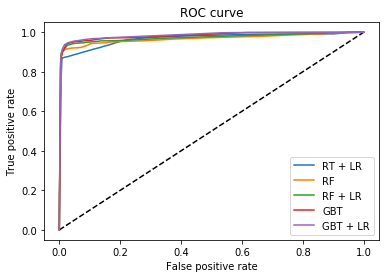

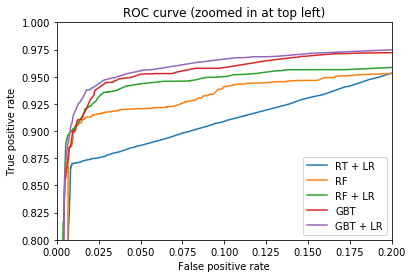

In [36]:
# Author: Tim Head <betatim@gmail.com>
# License: BSD 3 clause

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### Plot ROC curves for a specific class

In [44]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


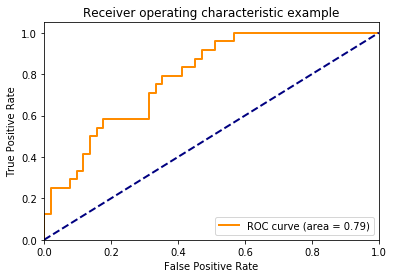

In [43]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Plot ROC curves for the multilabel problem

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


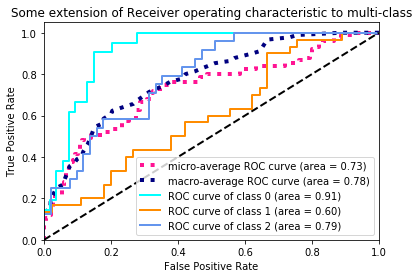

In [45]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Overfitting and Underfitting

### Overfitting

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

### Underfitting
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

It is worth noting the underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting.

### Underfitting vs. Overfitting
This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

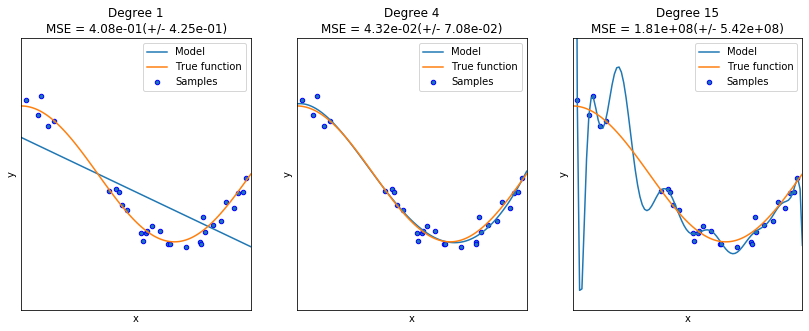

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### How to Detect Overfitting
A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.

To address this, we can split our initial dataset into separate training and test subsets.If our model does much better on the training set than on the test set, then we’re likely overfitting.For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set.Another tip is to start with a very simple model to serve as a benchmark.Then, as you try more complex algorithms, you’ll have a reference point to see if the additional complexity is worth it.

### How to Prevent Overfitting
Here are a few of the most popular solutions for overfitting:

#### Cross-validation
Cross-validation is a powerful preventative measure against overfitting.

The idea is clever: Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model. Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

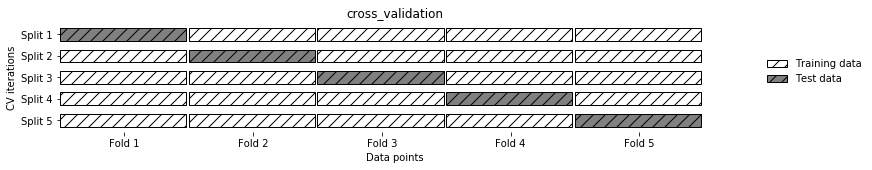

In [48]:
mglearn.plots.plot_cross_validation()

**K-Folds Cross Validation**
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.


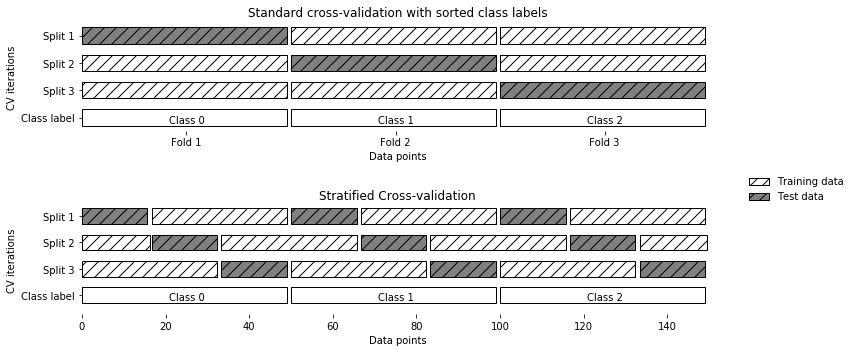

In [82]:
mglearn.plots.plot_stratified_cross_validation()

**Example**

In [83]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

As you can see, the function split the original data into different subsets of the data. Again, very simple example but I think it explains the concept pretty well.

**Cross-Validation in scikit-learn**

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:

from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'fit_time': array([0.02283287, 0.03142405, 0.01990819, 0.01797724, 0.01734686]),
 'score_time': array([0.00028586, 0.00049996, 0.00026274, 0.00021505, 0.00021291]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [53]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.022833,0.000286,0.966667,0.966667
1,0.031424,0.000500,1.000000,0.966667
2,0.019908,0.000263,0.933333,0.983333
3,0.017977,0.000215,0.966667,0.983333
4,0.017347,0.000213,1.000000,0.975000


Mean times and scores:
 fit_time       0.021898
score_time     0.000295
test_score     0.973333
train_score    0.975000
dtype: float64


**Shuffle-split cross-validation**

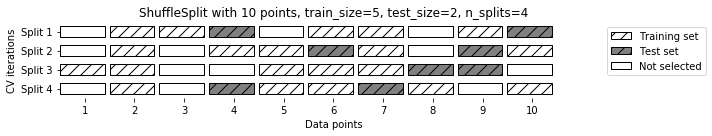

In [54]:
mglearn.plots.plot_shuffle_split()

In [55]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96       0.94666667 0.98666667 0.94666667 0.96       0.93333333
 1.         0.98666667 0.97333333 0.97333333]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

#### Leave One Out Cross Validation (LOOCV)

Another method for cross validation, Leave One Out Cross Validation (by the way, these methods are not the only two, there are a bunch of other methods for cross validation. Check them out in the Sklearn website). In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like k-fold.

**Example**

In [84]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


Again, simple example, but I really do think it helps in understanding the basic concept of this method.
So, what method should we use? How many folds? Well, the more folds we have, we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised. In smaller datasets, as I’ve mentioned before, it’s best to use LOOCV.

#### Train/Test Split Data
The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

It won’t work every time, but training with more data can help algorithms detect the signal better. 

In [65]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the Diabetes dataset
sklearn.datasets.load_diabetes(return_X_y=False)
# Declare the columns names
columns = 'age', 'sex', 'bmi', 'map' ,'tc' ,'ldl', 'hdl' ,'tch' ,'ltg' ,'glu' 
# Call the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()
# load the dataset as a pandas data frame
df = pd.DataFrame(diabetes.data, columns=columns)
# define the target variable (dependent variable) as y
y = diabetes.target

Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [68]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


Now we’ll fit the model on the training data:

In [73]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
#As you can see, we’re fitting the model on the training data and trying to predict the test data. 
predictions[0:5]

array([190.83316515, 167.47092403, 210.38009004, 226.47345114,
       176.86578111])

Plot the model

Text(0, 0.5, 'Predictions')

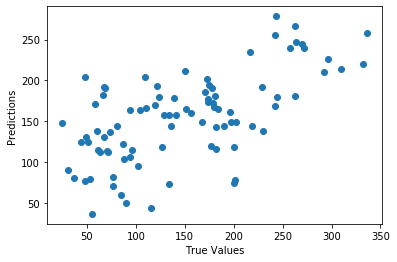

In [75]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Print the accuracy score

In [81]:
print ("Score:", model.score(X_test, y_test))

Score: 0.3832902615763687


## Quiz:
1): Imagine, you are working with “Analytics Vidhya” and you want to develop a machine learning algorithm which predicts the number of views on the articles. Your analysis is based on features like author name, number of articles written by the same author on Analytics Vidhya in past and a few other features. Which of the following evaluation metric would you choose in that case?

1.Mean Square Error
2.Accuracy
3.Brier Score

A) Only 1

B) Only 2

C) Only 3

D) 1 and 3

E) 2 and 3

F) 1 and 2

Solution:(A)<br>
You can think that the number of views of articles is the continuous target variable which fall under the regression problem. So, mean squared error will be used as an evaluation metrics.

2): Which of the following statements is/are true about “Type-1” and “Type-2” errors?

1.Type1 is known as false positive and Type2 is known as false negative.<br>
2.Type1 is known as false negative and Type2 is known as false positive.<br>
3.Type1 error occurs when we reject a null hypothesis when it is actually true.

A) Only 1

B) Only 2

C) Only 3

D) 1 and 2

E) 1 and 3

F) 2 and 3

Solution:(E)<br>
In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a “false positive”), while a type II error is incorrectly retaining a false null hypothesis (a “false negative”).

3): Imagine, you are solving a classification problems with highly imbalanced class. The majority class is observed 99% of times in the training data.Your model has 99% accuracy after taking the predictions on test data. Which of the following is true in such a case?

1.Accuracy metric is not a good idea for imbalanced class problems.<br>
2.Accuracy metric is a good idea for imbalanced class problems.<br>
3.Precision and recall metrics are good for imbalanced class problems.<br>
4.Precision and recall metrics aren’t good for imbalanced class problems.<br>

A) 1 and 3

B) 1 and 4

C) 2 and 3

D) 2 and 4

Solution: (A)

4): Which of the following options is/are true for K-fold cross-validation?

1.Increase in K will result in higher time required to cross validate the result.<br>
2.Higher values of K will result in higher confidence on the cross-validation result as compared to lower value of K.<br>
3.If K=N, then it is called Leave one out cross validation, where N is the number of observations.<br>

A) 1 and 2

B) 2 and 3

C) 1 and 3

D) 1,2 and 3

Solution: (D)<br>

Larger k value means less bias towards overestimating the true expected error (as training folds will be closer to the total dataset) and higher running time (as you are getting closer to the limit case: Leave-One-Out CV). We also need to consider the variance between the k folds accuracy while selecting the k.

## Citations
https://compstat-lmu.github.io/lecture_i2ml/articles/content.html<br>
https://nbviewer.jupyter.org/github/compstat-lmu/lecture_i2ml/blob/master/code-demos-pdf/code_demo_logreg.pdf
https://victorzhou.com/blog/intro-to-neural-networks/<br>
https://github.com/MuqadderIqbal/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb<br>
https://www.di.fc.ul.pt/~jpn/r/PRML/chapter4.html<br>
http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Logistic%20Regression%20(v3).pdf<br>
https://www.analyticsvidhya.com/blog/2017/04/40-questions-test-data-scientist-machine-learning-solution-skillpower-machine-learning-datafest-2017/<br>
https://elitedatascience.com/overfitting-in-machine-learning#goodness-of-fit<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6<br>


## License
Copyright 2020 Northeastern University

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.